In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files

In [5]:
uploaded=files.upload()

Saving Uber.csv to Uber.csv


In [6]:
uploaded

{'Uber.csv': b'Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp\r\n619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00\r\n867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47\r\n1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58\r\n2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03\r\n3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47\r\n3879,Airport,1,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59\r\n4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15\r\n5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52\r\n6248,City,1,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51\r\n267,City,2,Trip Completed,11/7/2016 6:46,11/7/2016 7:25\r\n1467,Airport,2,Trip Completed,12/7/2016 5:08,12/7/2016 6:02\r\n1983,City,2,Trip Completed,12/7/2016 12:30,12/7/2016 12:57\r\n2784,Airport,2,Trip Completed,13-07-2016 04:49:20,13-07-2016 05:23:03\r\n3075,City,2,Trip Completed,13-07-2016 0

In [7]:
#Loading Uber dataset
uber=pd.read_csv('Uber.csv')

In [8]:
#Looking first five data of uber
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
#Looking number of Rows and Columns
uber.shape

(6745, 6)

In [10]:
#Convert Request-timestamp to uniform datetime format
uber["Request timestamp"] = uber["Request timestamp"].apply(lambda x : pd.to_datetime(x))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [11]:
#convert Drop-timestamp to uniform datetime format
uber["Drop timestamp"]=uber['Drop timestamp'].apply(lambda x: pd.to_datetime(x))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
#Total request in City and Airport
uber['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

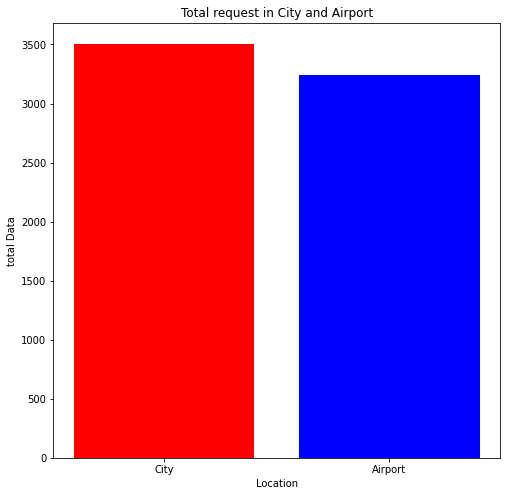

In [13]:
#Bar-Graph of total request in City and Airport
plt.figure(figsize=(8,8))
plt.bar(list(uber['Pickup point'].value_counts().keys()),list(uber['Pickup point'].value_counts()),color=["r","b",])
plt.title('Total request in City and Airport')
plt.xlabel('Location')
plt.ylabel('total Data')
plt.show()
     

In [14]:
#Looking at the status request
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

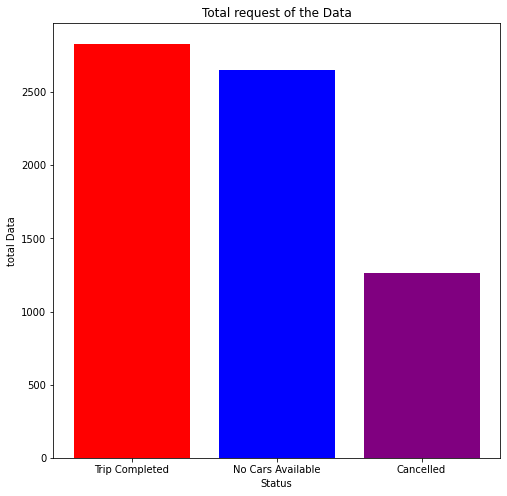

In [15]:
#Bar- Graph of the Total request
plt.figure(figsize=(8,8))
plt.bar(list(uber['Status'].value_counts().keys()),list(uber['Status'].value_counts()),color=["r","b",'purple'])
plt.title('Total request of the Data')
plt.xlabel('Status')
plt.ylabel('total Data')
plt.show()

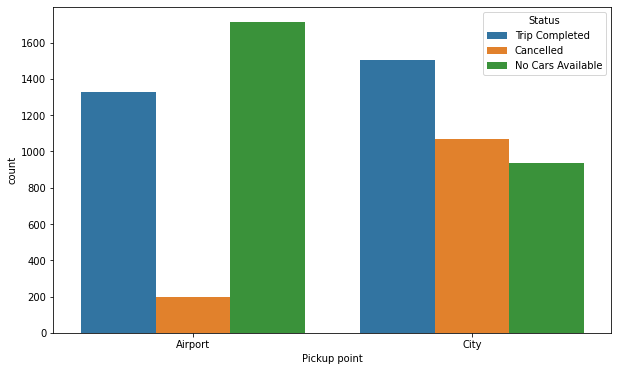

In [16]:
#Total number of data by per category
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=uber)
plt.show()

In [17]:
#filter all the cancelled trip
cancelled_trip=uber[uber['Status']=='Cancelled']

In [ ]:
cancelled_trip.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT


In [18]:
print(cancelled_trip.shape)

(1264, 6)


In [19]:
#looking for the data where cars is not available
no_cars=uber[uber['Status']=='No Cars Available']

In [ ]:
no_cars.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT


In [20]:
print(no_cars.shape)

(2650, 6)


In [21]:
completed_trip=uber[uber['Status']=='Trip Completed']

In [22]:
completed_trip.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [23]:
print(completed_trip.shape)

(2831, 6)


<ipython-input-24-2cf7c20f47de>:8: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='bottom left')


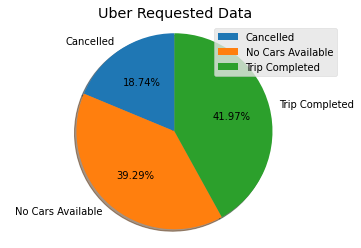

In [24]:
#making Pie-chart of the data
statuslabels = ["Cancelled", "No Cars Available", "Trip Completed"]
x=np.array([1264,2650,2831])
plt.pie(x,labels = statuslabels, autopct = '%2.2f%%',shadow=True,startangle=90)
plt.style.use('ggplot')
plt.title('Uber Requested Data')
plt.axis('equal')
plt.legend(loc='bottom left')

<ipython-input-30-f5d4a5181afd>:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='bottom left')


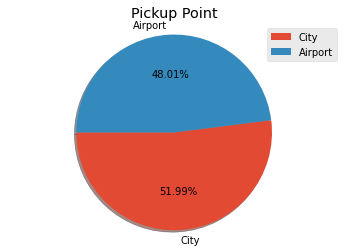

In [30]:
#Pie plot of the Pickup point Data
#making Pie-chart of the data
statuslabels = ["City", "Airport"]
x=np.array([3507,3238,])
plt.pie(x,labels = statuslabels, autopct = '%2.2f%%',shadow=True,startangle=180)
plt.style.use('ggplot')
plt.title('Pickup Point')
plt.axis('equal')
plt.legend(loc='bottom left')